# Nama Kelompok

1. Andy Nugraha Putra
2. Athallah Adjani Prasanna Basuki
3. Bonifasius Ekky Kusumawardhana
4. Elvaretta Salsabilla
5. Nafi'ul Alam Dary Vega

# UTS Machine Learning

## Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

**Impor library**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
from google.colab import drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Load Gambar*



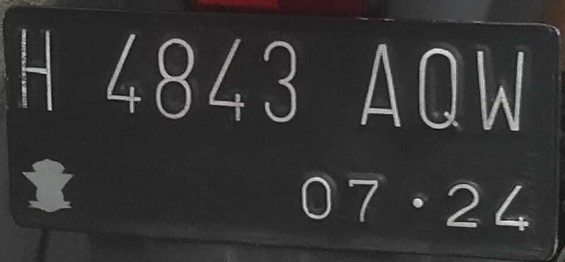

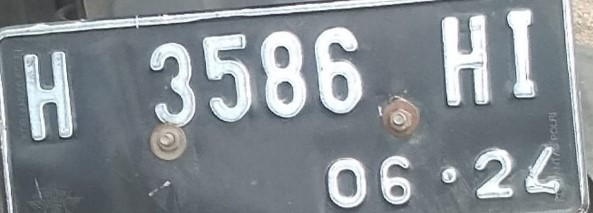

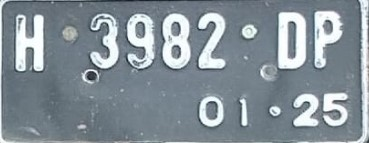

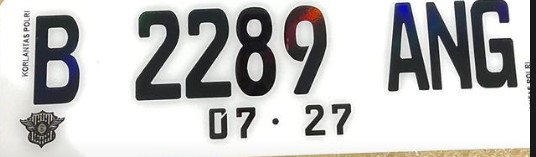

In [ ]:
filepaths = glob.glob('/content/drive/MyDrive/UTSML/PLATNOMOR/*.jpg')

for filepath in filepaths:
    # Load gambar
    img = cv2.imread(filepath)

    # Tampilkan gambar
    cv2_imshow(img)  # Hanya untuk Google Colab

# Plat Athallah


**Load gambar**

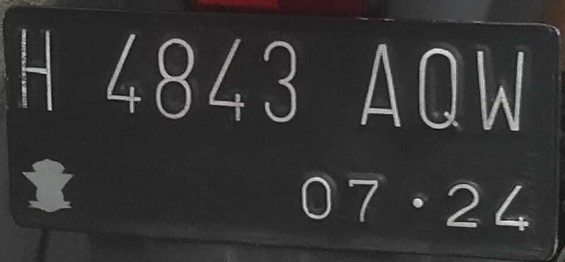

In [ ]:
platatha= cv2.imread('/content/drive/MyDrive/UTSML/PLATNOMOR/platatha.jpg')
# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(platatha) # khusus google colab karena ada issue

**Menampilkan tinggi, lebar, dan jumlah kanal gambar**

In [ ]:
h, w, ch= platatha.shape
print(h)
print(w)
print(ch)

262
565
3


**Normalisasi gambar**

In [ ]:

data = platatha / 255.0
data = data.reshape(h * w, ch)
data.shape


(148030, 3)

**plot ruang warna rgb**

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

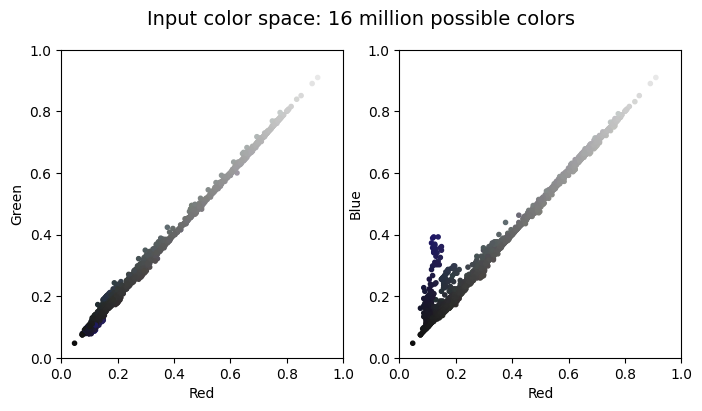

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

**Segmentasi citra menggunakan algoritma K-Means**

In [ ]:
from sklearn.cluster import KMeans

# Mengubah gambar dari BGR ke RGB (karena OpenCV memuat gambar dalam format BGR)
platatha_rgb = cv2.cvtColor(platatha, cv2.COLOR_BGR2RGB)

# Merubah citra menjadi array 2D (setiap piksel menjadi satu baris dengan nilai RGB sebagai kolom)
citra_reshape = platatha_rgb.reshape((-1, 3))

# Tentukan jumlah klaster
jumlah_klaster = 2

# Terapkan K-Means clustering
kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Mendapatkan label klaster dan mengubahnya kembali ke bentuk gambar
label_klaster = kmeans.labels_.reshape(platatha_rgb.shape[:2])

# Membuat salinan citra untuk dimodifikasi
citra_segmentasi = platatha_rgb.copy()

# Ubah piksel dari klaster 0 menjadi hitam (atau bisa juga warna lain, misalnya merah)
citra_segmentasi[np.where(label_klaster == 0)] = [0, 0, 0]  # Warna hitam

**Hasil segmentasi**

Text(0.5, 1.0, '2-color Image')

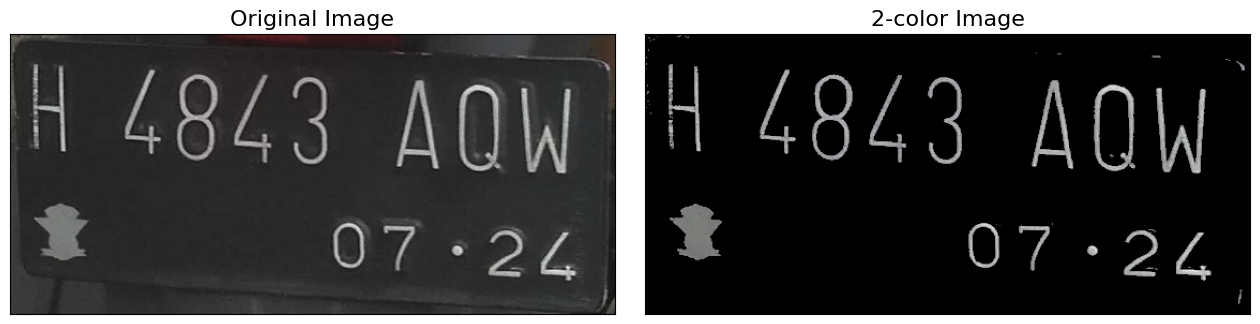

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(platatha, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# Plat Elvaretta

Load gambar

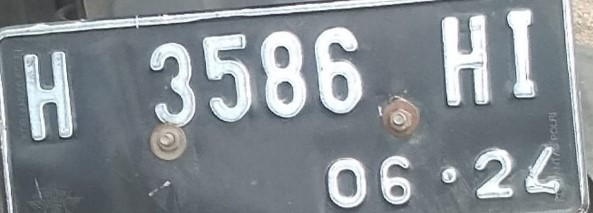

In [ ]:
# Load Gambar
platelva = cv2.imread('/content/drive/MyDrive/UTSML/PLATNOMOR/platelva.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(platelva) # khusus google colab karena ada issue

**Menampilkan tinggi, lebar, dan jumlah kanal gambar**

In [ ]:
h, w, ch= platelva.shape
print(h)
print(w)
print(ch)

213
593
3


**Normalisasi gambar**

In [ ]:
data = platelva / 255.0
data = data.reshape(h * w, ch)
data.shape

(126309, 3)

**plot ruang warna rgb**

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

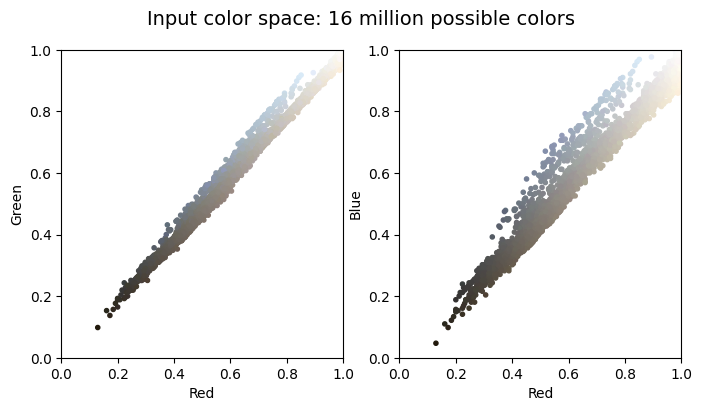

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

**Segmentasi citra menggunakan algoritma K-Means**

In [ ]:
# Mengubah gambar dari BGR ke RGB (karena OpenCV memuat gambar dalam format BGR)
platelva_rgb = cv2.cvtColor(platelva, cv2.COLOR_BGR2RGB)

# Merubah citra menjadi array 2D (setiap piksel menjadi satu baris dengan nilai RGB sebagai kolom)
citra_reshape = platelva_rgb.reshape((-1, 3))

# Tentukan jumlah klaster
jumlah_klaster = 2

# Terapkan K-Means clustering
kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Mendapatkan label klaster dan mengubahnya kembali ke bentuk gambar
label_klaster = kmeans.labels_.reshape(platelva_rgb.shape[:2])

# Membuat salinan citra untuk dimodifikasi
citra_segmentasi = platelva_rgb.copy()

# Ubah piksel dari klaster 0 menjadi hitam (atau bisa juga warna lain, misalnya merah)
citra_segmentasi[np.where(label_klaster == 0)] = [0, 0, 0]  # Warna hitam


**Hasil Segmentasi**

Text(0.5, 1.0, '2-color Image')

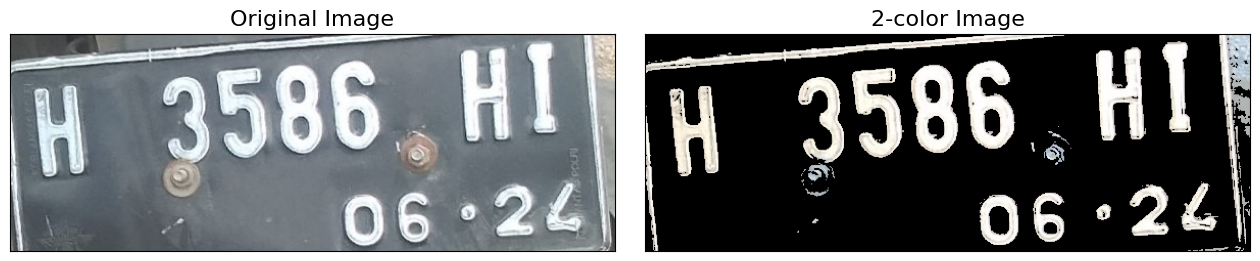

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(platelva, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# Plat Bonifasius

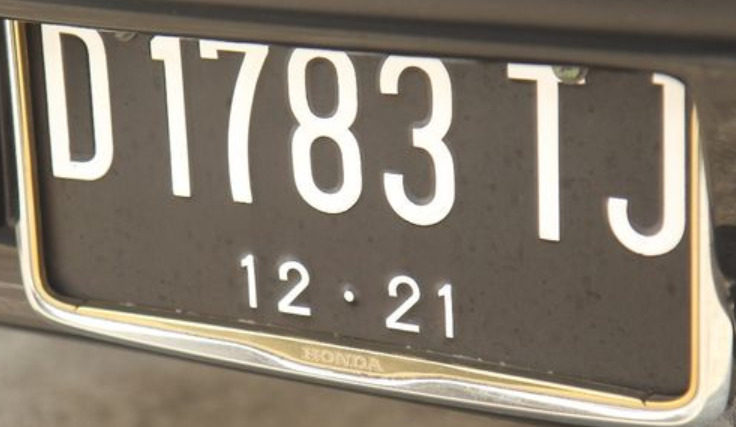

In [ ]:
# Load Gambar
platboni = cv2.imread('/content/drive/MyDrive/UTSML/PlatNomor/platBoni.jpg')


cv2_imshow(platboni)

**Menampilkan tinggi, lebar, dan jumlah kanal gambar**

In [ ]:
h, w, ch= platboni.shape
print(h)
print(w)
print(ch)

427
736
3


**Normalisasi Gambar**

In [ ]:
data = platboni / 255.0
data = data.reshape(h * w, ch)
data.shape

(314272, 3)

**Plot ruang warna RGB**

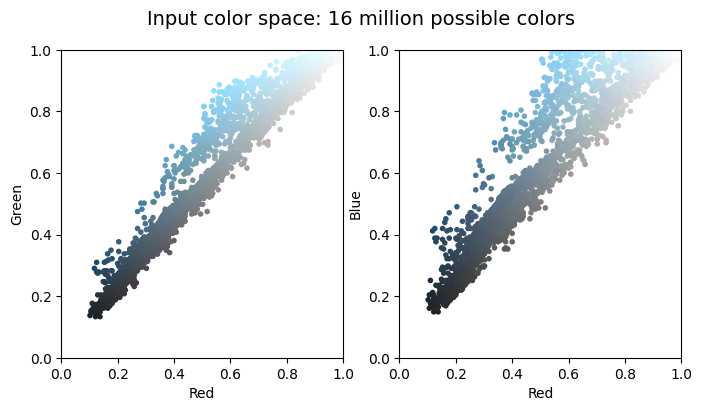

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

**Segmentasi citra menggunakan algoritma K-Means**

In [ ]:
# Mengubah gambar dari BGR ke RGB (karena OpenCV memuat gambar dalam format BGR)
platboni_rgb = cv2.cvtColor(platboni, cv2.COLOR_BGR2RGB)

# Merubah citra menjadi array 2D (setiap piksel menjadi satu baris dengan nilai RGB sebagai kolom)
citra_reshape = platboni_rgb.reshape((-1, 3))

# Tentukan jumlah klaster
jumlah_klaster = 2

# Terapkan K-Means clustering
kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Mendapatkan label klaster dan mengubahnya kembali ke bentuk gambar
label_klaster = kmeans.labels_.reshape(platboni_rgb.shape[:2])

# Membuat salinan citra untuk dimodifikasi
citra_segmentasi = platboni_rgb.copy()

# Ubah piksel dari klaster 0 menjadi hitam (atau bisa juga warna lain, misalnya merah)
citra_segmentasi[np.where(label_klaster == 0)] = [0, 0, 0]  # Warna hitam


**Hasil Segmentasi**

Text(0.5, 1.0, '2-color Image')

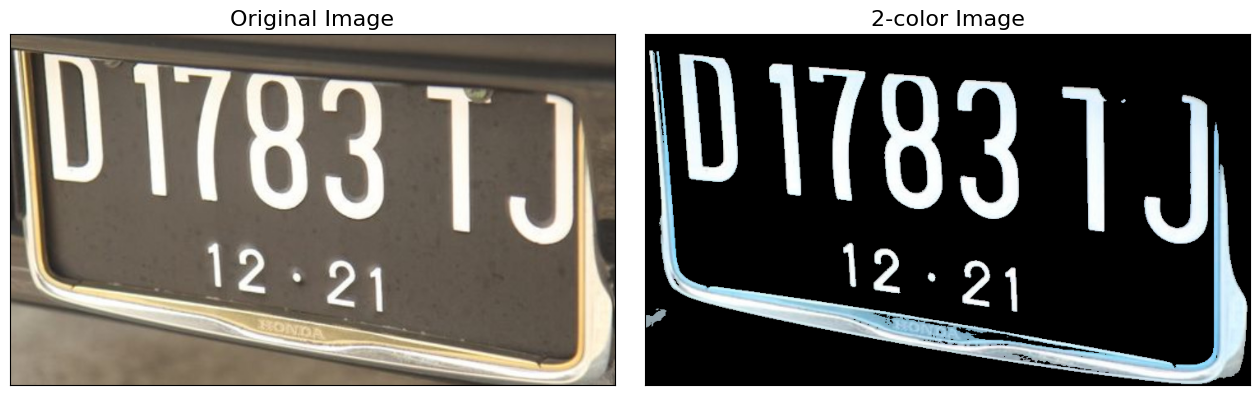

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(platboni, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

# Plat Andy Nugraha

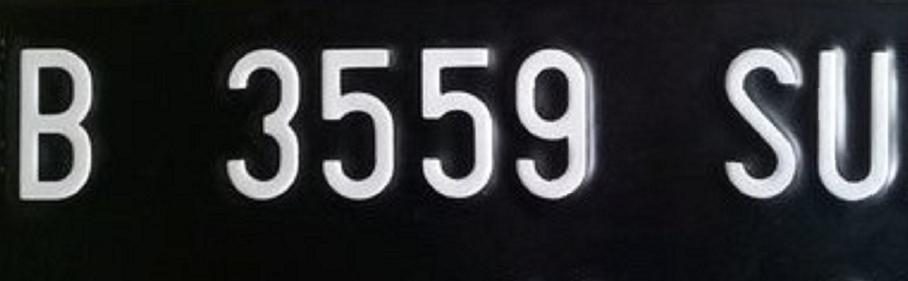

In [ ]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/ML/2.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

Text(0.5, 1.0, '2-color Image')

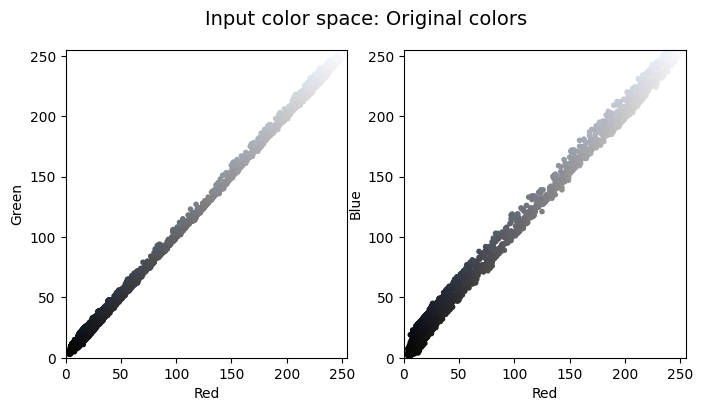

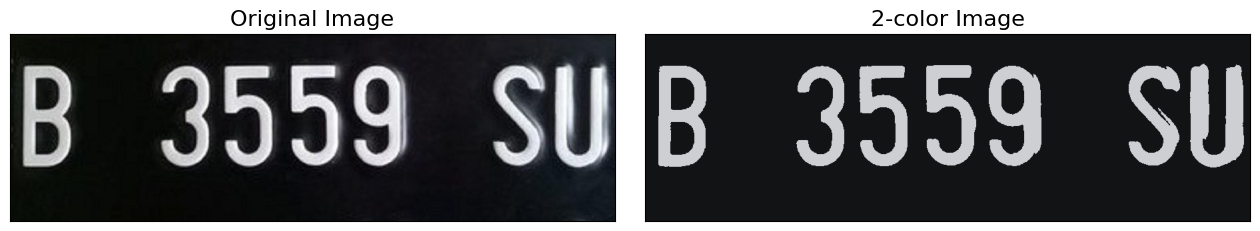

In [ ]:
from sklearn.cluster import KMeans

# Langkah 1: Konversi gambar ke ruang warna RGB (jika belum dalam ruang warna tersebut)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, ch = img_rgb.shape

data = img_rgb.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset data acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, c=colors/255.0, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

    ax[1].scatter(R, B, c=colors/255.0, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: Original colors')

# Definisikan model k-means dengan lebih sedikit cluster (misalnya, 2 cluster)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)  # Jumlah cluster yang Anda inginkan

# Fit data ke model k-means
kmeans.fit(data)

# Mendapatkan nilai titik tengah dari setiap cluster
cluster_centers = kmeans.cluster_centers_

# Tambahkan inisialisasi new_colors
new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Pastikan Anda menggunakan img_rgb dan new_colors yang benar
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_colors.astype(np.uint8))  # Jangan lupa untuk mengonversi ke tipe data uint8
ax[1].set_title('2-color Image', size=16)

# Plat Nafiul

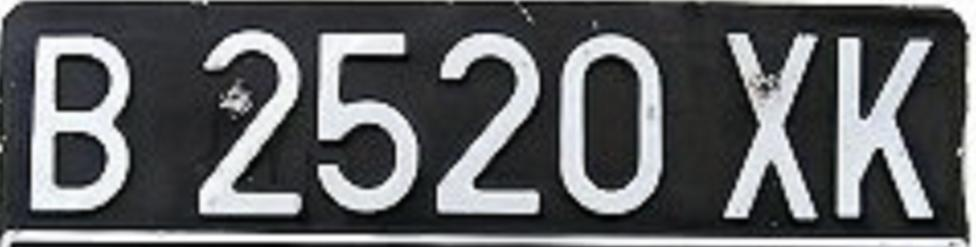

In [ ]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/ML/5.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img)

Text(0.5, 1.0, '2-color Image')

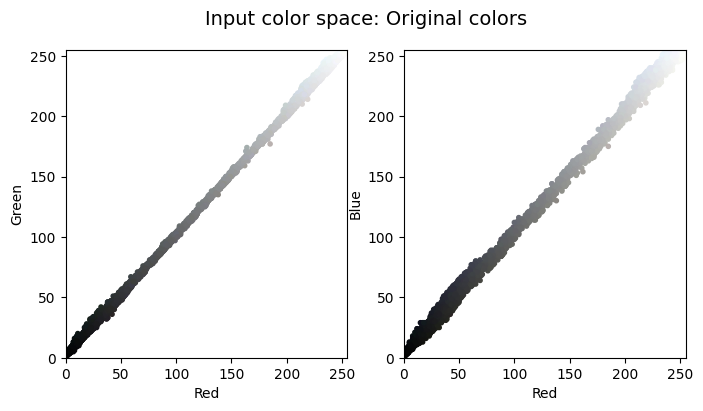

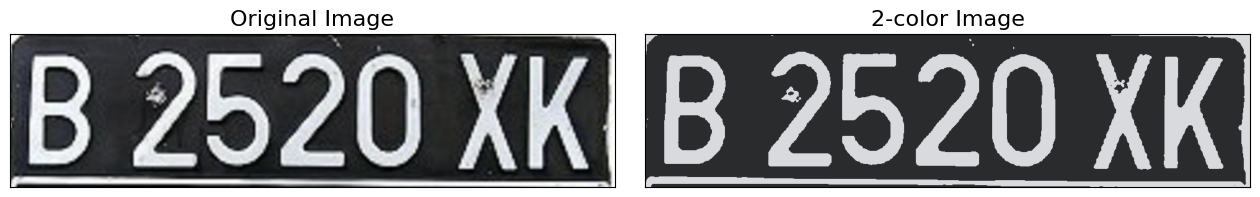

In [ ]:
from sklearn.cluster import KMeans

# Langkah 1: Konversi gambar ke ruang warna RGB (jika belum dalam ruang warna tersebut)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, ch = img_rgb.shape

data = img_rgb.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset data acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, c=colors/255.0, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

    ax[1].scatter(R, B, c=colors/255.0, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: Original colors')

# Definisikan model k-means dengan lebih sedikit cluster (misalnya, 2 cluster)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)  # Jumlah cluster yang Anda inginkan

# Fit data ke model k-means
kmeans.fit(data)

# Mendapatkan nilai titik tengah dari setiap cluster
cluster_centers = kmeans.cluster_centers_

# Tambahkan inisialisasi new_colors
new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Pastikan Anda menggunakan img_rgb dan new_colors yang benar
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_colors.astype(np.uint8))  # Jangan lupa untuk mengonversi ke tipe data uint8
ax[1].set_title('2-color Image', size=16)